<a href="https://colab.research.google.com/github/pacomm5/PLANTILLAS2/blob/main/CLUSTER_KMEANS_MEDIUM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## la verdad que este ejercicio no me vale de mucho, quizas para ver como convertir en un dataframe el tema de los clusteres. 
NO ME ENTERO NI DEL NODO

In [ ]:
# PASOS A SEGUIR
# DETERMINAR EL NUMERO DE K, NORMALMENTE CON EL METODO DEL CODO
# ELEGIR LOS CENTROIDES.
# CALCULAR LA DISTANCIA ENTRE LOS PUNTOS Y LOS CENTROIDES. 
# CRITERIOS DE DETENCION. 
# https://medium.com/geekculture/why-do-initial-cluster-centroids-in-k-means-affect-the-final-cluster-generated-71c115141be8

In [4]:
# para manipulación de datos.
import pandas as pd
# calculos de algebra
import numpy as np
# para generar datos.
from sklearn.cluster import KMeans
# para datos visuales. 
import plotnine
from plotnine import *
# para numeros aleatorios.
import random
# para ignorar warnings
import warnings
warnings.filterwarnings("ignore")
# en este he importado make_blobs que significa hacer bloques.
from sklearn.datasets import make_blobs

In [5]:
# vamos a generar datos dummy. 
features, clusters = make_blobs(
    n_samples = 2000,
    n_features = 2,
    centers = 3,
    cluster_std = 0.8,
    shuffle = True,
    random_state = 9
)

In [6]:
# vamos a concatenar los arrays. 
array = np.column_stack([features, clusters])
array

array([[ -1.12165821,  -6.93867365,   1.        ],
       [-11.1996175 ,   0.1390546 ,   0.        ],
       [ -9.82051884,   0.17331046,   0.        ],
       ...,
       [  1.87317622,  -8.03479076,   1.        ],
       [ -6.33051068,  -6.01479745,   2.        ],
       [ -9.36028648,   0.28474266,   0.        ]])

In [7]:
# ahora de esto vamos a hacer un dataframe
df = pd.DataFrame(data = array,
                  columns= [
                            "Feature 1",
                            "Feature 2",
                            "Cluster"
                  ]
)
# ahora mostramos el dataframe. 

print("Dimension: {} rows and {} columns".format(
    len(df),
    len(df.columns))
)
df = df.astype({"Cluster": object})
df.head()

Dimension: 2000 rows and 3 columns


,Feature 1,Feature 2,Cluster
0,-1.121658,-6.938674,1.0
1,-11.199618,0.139055,0.0
2,-9.820519,0.173310,0.0
3,-10.481695,-0.809478,0.0
4,-7.200004,-7.886425,2.0


In [11]:
# Centroids
df_centroids = df.groupby(['Cluster']).mean().reset_index().rename(columns = {
    'Feature 1': 'Centroid Feature 1',
    'Feature 2': 'Centroid Feature 2'
    }
).astype({'Cluster': object})
df_centroids

,Cluster,Centroid Feature 1,Centroid Feature 2
0,0.0,-9.761820,0.059333
1,1.0,-0.099508,-7.355097
2,2.0,-7.193134,-5.640867


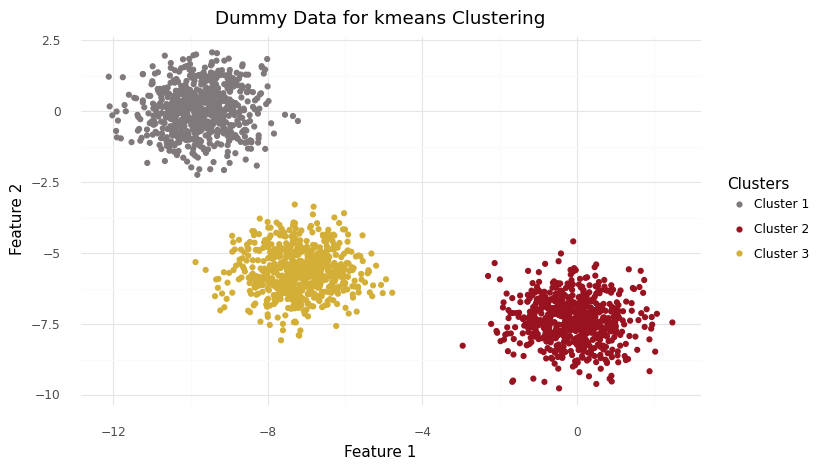

<ggplot: (8744743991233)>

In [12]:
# Scatterplot
plotnine.options.figure_size = (8, 4.8)
(
    ggplot()+
    geom_point(aes(x = 'Feature 1',
                   y = 'Feature 2',
                   color = 'Cluster'),
               data = df)+
    labs(title = 'Dummy Data for kmeans Clustering')+
    xlab('Feature 1')+
    ylab('Feature 2')+
    scale_color_manual(name = 'Clusters', 
                       values = [
                           '#80797c',
                           '#981220',
                           '#D4AF37'
                       ],
                       labels = [
                           'Cluster 1',
                           'Cluster 2',
                           'Cluster 3'
                       ]
                      )+
    theme_minimal()
)

In [13]:
# vamos a crear tres pares de centroides de clusteres iniciales. estos vendrán del minimo y el máximo de y
# Feature 1
feature1_min = df['Feature 1'].min()
feature1_max = df['Feature 1'].max()
print('Feature 1 has minimum {} and maximum {}'.format(
    feature1_min, feature1_max
    )
)
# Feature 2
feature2_min = df['Feature 2'].min()
feature2_max = df['Feature 2'].max()
print('Feature 2 has minimum {} and maximum {}'.format(
    feature2_min, feature2_max
    )
)

Feature 1 has minimum -12.119432493216202 and maximum 2.468113171142167
Feature 2 has minimum -9.76023376218459 and maximum 2.0749286732011214


In [14]:
# Initial centroids
cent_feature1 = [random.uniform(feature1_min, feature1_max) for _ in range(3)]
cent_feature2 = [random.uniform(feature2_min, feature2_max) for _ in range(3)]
print('Centroid for feature 1: {}'.format(cent_feature1))
print('Centroid for feature 2: {}'.format(cent_feature2))
# Merge into array
centroid_init = np.array((cent_feature1, cent_feature2)).transpose()
print('\nInitial centroid:\n {}'.format(centroid_init))

Centroid for feature 1: [-10.652101052772013, 2.1384288768636797, -2.4914382240835344]
Centroid for feature 2: [-7.292735678078228, -6.336318998147469, -1.0825511947932718]

Initial centroid:
 [[-10.65210105  -7.29273568]
 [  2.13842888  -6.336319  ]
 [ -2.49143822  -1.08255119]]


In [15]:
## AHORA VAMOS A CREAR UNO DESDE EL PRINCIPIO

kmeans = KMeans(
    n_clusters= 3,
    random_state= 0,
    init = centroid_init,
    n_init = 50
)
# ahora lo que vamos a hacer es ajustar el modelo

kmeans.fit(df[["Feature 1", "Feature 2"]])

KMeans(init=array([[-10.65210105,  -7.29273568],
       [  2.13842888,  -6.336319  ],
       [ -2.49143822,  -1.08255119]]),
       n_clusters=3, n_init=50, random_state=0)

In [16]:
#centroids
kmeans.cluster_centers_

array([[-7.19313408, -5.64086716],
       [-0.0995083 , -7.35509742],
       [-9.76182007,  0.05933306]])

In [18]:
# tecnicamente el algoritmo k-means que hemos estado ejecutando necesita 5 iteracciones para converger. para cada iteracion, alacenaremos y visualizaremos sus centroides de cluster generados. 
# Number of iterations
n_iter = kmeans.n_iter_
print('kmeans clustering algorithm needs {} iteration to converge'.format(n_iter))
# Output

# esto lo que nos va a decir el numero de interacciones que necesita para converger el algoritmo. 

kmeans clustering algorithm needs 3 iteration to converge


In [19]:
# vamos a generar un bucle para que nos guarde las iteracciones. 
# Get centroids each iterations - how kmeans works
centroids = {}
for i in range(n_iter):
    # Apply kmeans
    kmeans = KMeans(
        n_clusters = 3,
        random_state = 0,
        init = centroid_init,
        max_iter = i + 1
    )
    kmeans.fit(df[['Feature 1', 'Feature 2']])
    centroid = kmeans.cluster_centers_
    # Store the centroids
    centroids.update({'Iteration {}'.format(i + 1): centroid})
# Array of centroids
centroids


{'Iteration 1': array([[-8.28558325e+00, -3.89365915e+00],
        [-9.64558563e-02, -7.35811185e+00],
        [-8.94940776e+00, -6.65933430e-04]]),
 'Iteration 2': array([[-7.20161429, -5.62487414],
        [-0.0995083 , -7.35509742],
        [-9.76488151,  0.06897352]]),
 'Iteration 3': array([[-7.19313408, -5.64086716],
        [-0.0995083 , -7.35509742],
        [-9.76182007,  0.05933306]])}

In [20]:
# almacena los ceentroides del cluster para cada iteracción (en una matriz). para visualizar el cluster mediante, debe convertirse en un dataframe. 

# Transpose the array
feature_1 = []
feature_2 = []
iterations = []
for key in list(centroids.keys()):
    for i, j in centroids[key]:
        feature_1.append(i)
        feature_2.append(j)
        iterations.append(key)
# Create a data frame
df_iteration = pd.DataFrame(
    {
        'Centroid Feature 1': feature_1,
        'Centroid Feature 2': feature_2,
        'Cluster': [
            'Cluster 1',
            'Cluster 2',
            'Cluster 3'
        ] * (len(feature_1) // 3),
        'Iteration': iterations
    }
)
# Show data frame
df_iteration.head()

,Centroid Feature 1,Centroid Feature 2,Cluster,Iteration
0,-8.285583,-3.893659,Cluster 1,Iteration 1
1,-0.096456,-7.358112,Cluster 2,Iteration 1
2,-8.949408,-0.000666,Cluster 3,Iteration 1
3,-7.201614,-5.624874,Cluster 1,Iteration 2
4,-0.099508,-7.355097,Cluster 2,Iteration 2


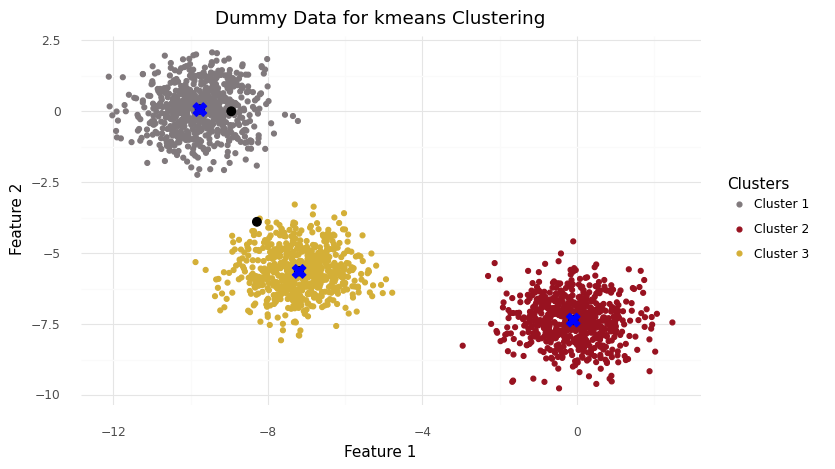

<ggplot: (8744739885037)>

In [21]:
# lo que vamos a ver debajo las cruces azules son los centroides de cumulo rales, mientras que los puntos negros son los centroides de cumulo en 3 iteraciones. 
# Scatterplot
plotnine.options.figure_size = (8, 4.8)
(
    ggplot()+
    geom_point(aes(x = 'Feature 1',
                   y = 'Feature 2',
                   color = 'Cluster'),
               data = df)+
    geom_point(aes(x = 'Centroid Feature 1',
                   y = 'Centroid Feature 2'),
               color = '#000000',
               size = 3,
               show_legend = False,
               data = df_iteration)+
    geom_point(aes(x = 'Centroid Feature 1',
                   y = 'Centroid Feature 2'),
               shape = 'X',
               color = '#0000FF',
               size = 5,
               show_legend = False,
               data = df_centroids)+
    labs(title = 'Dummy Data for kmeans Clustering')+
    xlab('Feature 1')+
    ylab('Feature 2')+
    scale_color_manual(name = 'Clusters',
                       values = [
                           '#80797c',
                           '#981220',
                           '#D4AF37'
                       ],
                       labels = [
                           'Cluster 1',
                           'Cluster 2',
                           'Cluster 3'
                       ]
                      )+
    theme_minimal()
)

In [ ]:
## no sigo porque es bastante lioso. no me entero de mucho.....